# Morfometrie: Introductie tot het Tellen van Bacteriekolonies

Deze demo introduceert de toepassing van _morfometrie_ voor het analyseren en tellen van bacteriekolonies in afbeeldingen met Python en scikit-image.

## Wat is Morfometrie (Morphometrics)?
[Morfometrie](https://nl.wikipedia.org/wiki/Morfometrie) richt zich op de kwantitatieve analyse van vormen en maten in biologische structuren. In dit voorbeeld wordt deze techniek toegepast om bacteriekolonies visueel te identificeren en te tellen.

## Over de Demo
- **Doel:** Een inzicht geven in hoe bacteriekolonies in afbeeldingen gedetecteerd en geteld kunnen worden.
- **Werkwijze:** 
  - De afbeeldingen worden geanalyseerd om de individuele bacteriekolonies te lokaliseren.
  - Er wordt aandacht besteed aan de detectie van de randen van elke kolonie.
  - Het uiteindelijke doel is om een betrouwbaar aantal bacteriekolonies te verkrijgen.

## Belangrijke Punten
- **Nauwkeurigheid:** Een goede beeldanalyse is cruciaal om overlappingen en fouten te voorkomen.
- **Automatisering:** Er kunnen geavanceerde beeldverwerkingstools worden ingezet voor een efficiënte en herhaalbare telling.
- **Validatie:** Resultaten worden vaak vergeleken met handmatige tellingen om de nauwkeurigheid te controleren.

Deze demo geeft een overzicht van de methoden die gebruikt worden in morphometrische analyses en benadrukt de mogelijkheden van automatische beeldverwerking bij het analyseren van biologische beelden.

> Bron: https://thejacksonlaboratory.github.io/image-processing-ia/instructor/09-challenges.html#morphometrics-bacteria-colony-counting


---

## Deel 1 - Uitleg van de Python Code voor het Tellen van Bacteriekolonies

De onderstaande code laat zien hoe je een afbeelding met bacteriekolonies inleest, verwerkt en vervolgens het aantal kolonies telt. Hieronder wordt per stap uitgelegd wat de code doet.

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib ipympl
# verander naar `%matplotlib inline` bij problemen

### 1. Afbeelding Inladen en Tonen

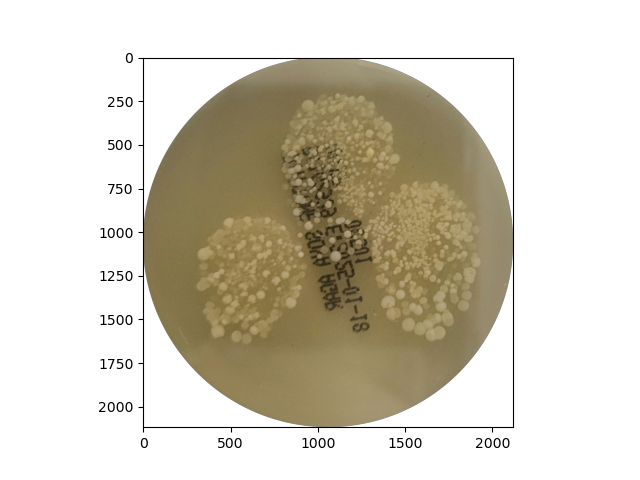

In [2]:
# Afbeelding inladen
bacteria_image = iio.imread(uri="data/voorbeeld.tiff")

# Toon de originele afbeelding
fig, ax = plt.subplots()
plt.imshow(bacteria_image)

### 2. Conversie naar Grijswaarden

* `rgb2gray`: Zet de RGB-afbeelding om in een grijswaardenafbeelding, wat de verwerking vereenvoudigt.
* `cmap="gray"`: Zorgt ervoor dat de afbeelding in grijswaarden wordt weergegeven.

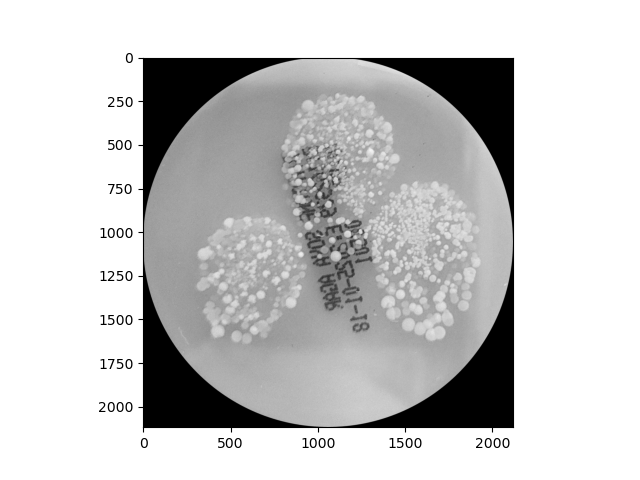

In [3]:
# Controleer of de afbeelding een alpha-kanaal heeft
if bacteria_image.ndim == 3 and bacteria_image.shape[-1] == 4:
    # Indien de afbeelding in uint8-formaat is, normaliseer dan naar [0,1]
    if bacteria_image.dtype == np.uint8:
        bacteria_image = bacteria_image.astype(np.float32) / 255.0

    # Haal de alpha-laag op
    alpha = bacteria_image[..., 3]
    # Vermenigvuldig de RGB-kanalen met de alpha-laag (waardoor transparante delen zwart worden)
    bacteria_image[..., :3] = bacteria_image[..., :3] * alpha[..., np.newaxis]
    # Verwijder het alpha-kanaal
    bacteria_image = bacteria_image[..., :3]

# Conversie naar grijswaarden
gray_bacteria = ski.color.rgb2gray(bacteria_image)

# Toon de grijswaardenafbeelding
fig, ax = plt.subplots()
plt.imshow(gray_bacteria, cmap="gray")

### 3. Afbeeldingsverwerking: Blurren en Histogram

* `Gaussian Blur`: Past een Gaussiaanse filter toe om de afbeelding te vervagen, wat ruis vermindert.
* `np.histogram`: Bereken een histogram dat de verdeling van de grijswaarden toont.
* `plt.plot`: Visualiseert het histogram, zodat je de intensiteitsverdeling kunt zien.

(0.0, 1.0)

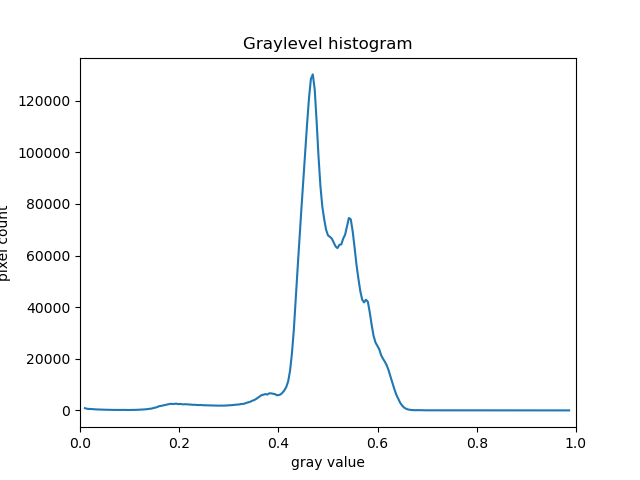

In [4]:
# Verwerk de afbeelding door deze te vervagen
blurred_image = ski.filters.gaussian(gray_bacteria, sigma=1.0)

# Maak een histogram van de grijswaarden
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.01, .99))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)

### 4. Aanmaken van een Masker

* `mask`: Selecteert de regio's van de afbeelding die buiten het bereik liggen (hier: pixelwaarden tussen 0 en 0.55) en markeert deze als achtergrond.
* `~ (not)`: Keert de logische waarden om zodat de gewenste regio's (bacteriekolonies) behouden blijven.

**Opgelet:** De markering is een voorbeeld. Bepaal aan de hand van het histogram in de vorige figuur de grenswaarden voor de maskering. Speel met de waarden en het omkeren van het gebied zodat de kolonies als afzonderlijke witte gebieden verschijnen. 

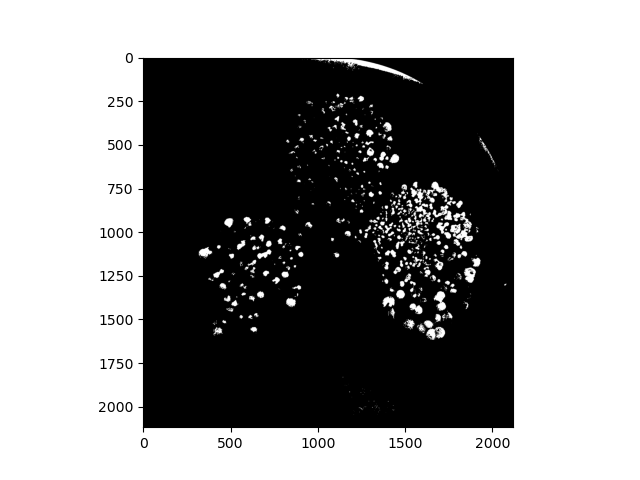

In [5]:
# Maak een masker: pixels binnen een bepaalde grijswaardereeks worden als achtergrond beschouwd
mask = (blurred_image > 0.6) & (blurred_image < .7)
fig, ax = plt.subplots()
plt.imshow(mask, cmap="gray")

### 5. Labelen en Tellen van Kolonies

* `ski.measure.label`: Labelt elke afzonderlijke bacteriekolonie als een unieke regio.
* `return_num=True`: Geeft het aantal gelabelde objecten (kolonies) terug.
* `print(count)`: Drukt het totale aantal kolonies af.

In [6]:
# Label de verbonden componenten in het masker en tel het aantal
labeled_image, count = ski.measure.label(mask, return_num=True)
print(count)

903


### 6. Kleuren en Visualiseren van de Gelabelde Kolonies

* `label2rgb`: Geeft elke gelabelde regio een unieke kleur zodat je ze kunt onderscheiden.
* `gray2rgb`: Zet de grijswaardenafbeelding om in een RGB-afbeelding zodat er een kleurenoverlay mogelijk is.
* `Overlay`: De gekleurde labels worden toegepast op de originele grijswaardenafbeelding om de resultaten duidelijk te visualiseren.

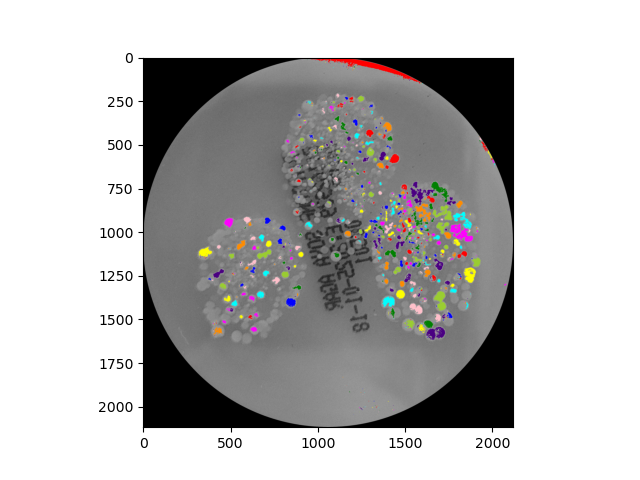

In [7]:
# Wijs voor elke gelabelde kolonie een unieke kleur toe
colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)

# Converteer de grijswaardenafbeelding naar een RGB-afbeelding voor de overlay
summary_image = ski.color.gray2rgb(gray_bacteria)
summary_image[mask] = colored_label_image[mask]

# Plot de overlay met de gekleurde kolonies
fig, ax = plt.subplots()
plt.imshow(summary_image)

Deze code demonstreert stap voor stap hoe beeldverwerkingstechnieken toegepast worden om bacteriekolonies te detecteren, te tellen en visueel te presenteren.

---


## Deel 2 - Functie voor het Repetitief Tellen van Bacteriekolonies

In dit voorbeeld maken we een functie om herhaaldelijk bacteriekolonies tellen in verschillende afbeeldingen. 
De onderstaande functie accepteert twee optionele parameters om een masker te definiëren:
- **mask_func:** Een functie die op de vervaagde afbeelding wordt toegepast en een boolean-masker retourneert.
- **threshold:** Een float-waarde die als drempel gebruikt wordt om een standaard masker te maken.

Als zowel `mask_func` als `threshold` worden meegegeven, krijgt `mask_func` voorrang. Wordt niets meegegeven, dan wordt een standaard drempel van `0.55` gebruikt.

In [8]:
def count_colonies(image_filename, mask_func=None, threshold=None):
    """
    Tel bacteriekolonies in een afbeelding en visualiseer de resultaten.
    
    Parameters:
        image_filename (str): Het pad naar de afbeelding met bacteriekolonies.
        mask_func (function, optional): Een functie die een boolean masker retourneert op basis van 
            de bewerkte grijswaardenafbeelding. Bijvoorbeeld: 
                def custom_mask(blurred_image):
                    return ~( (blurred_image < 0.55) & (blurred_image > 0) )
        threshold (float, optional): Een drempelwaarde om een standaard masker te maken.
            Als deze parameter wordt meegegeven (en mask_func niet), wordt het masker gemaakt als:
                mask = blurred_image > threshold
            Als geen van beide is meegegeven, wordt standaard threshold = 0.55 gebruikt.
    
    Returns:
        int: Het aantal getelde bacteriekolonies.
    """
    # Afbeelding inlezen
    bacteria_image = iio.imread(image_filename)

    # Alpha-kanaal omzetten naar zwart
    if bacteria_image.ndim == 3 and bacteria_image.shape[-1] == 4:
        # Indien de afbeelding in uint8-formaat is, normaliseer dan naar [0,1]
        if bacteria_image.dtype == np.uint8:
            bacteria_image = bacteria_image.astype(np.float32) / 255.0
    
        # Haal de alpha-laag op
        alpha = bacteria_image[..., 3]
        # Vermenigvuldig de RGB-kanalen met de alpha-laag (waardoor transparante delen zwart worden)
        bacteria_image[..., :3] = bacteria_image[..., :3] * alpha[..., np.newaxis]
        # Verwijder het alpha-kanaal
        bacteria_image = bacteria_image[..., :3]
    
    # Conversie naar grijswaarden
    gray_bacteria = ski.color.rgb2gray(bacteria_image)
    
    # Vervagen om ruis te verminderen
    blurred_image = ski.filters.gaussian(gray_bacteria, sigma=1.0)
    
    # Bepaal het masker op basis van de meegegeven parameters
    if mask_func is not None:
        # Gebruik de meegegeven maskerfunctie
        mask = mask_func(blurred_image)
    elif threshold is not None:
        # Gebruik de drempelwaarde om het masker te maken
        mask = blurred_image > threshold
    else:
        # Standaard: gebruik een drempelwaarde van 0.55
        mask = blurred_image > 0.55
    
    # Label de verbonden componenten en tel het aantal kolonies
    labeled_image, count = ski.measure.label(mask, return_num=True)
    print(f"Er zijn {count} kolonies in {image_filename}")
    
    # Genereer een gekleurde versie van de gelabelde kolonies voor visualisatie
    colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)
    
    # Converteer de grijswaardenafbeelding naar een RGB-afbeelding voor de overlay
    summary_image = ski.color.gray2rgb(gray_bacteria)
    
    # Vervang de pixelwaarden in de regio's gedefinieerd door het masker door de gekleurde labels
    summary_image[mask] = colored_label_image[mask]
    
    # Toon de resultaatafbeelding
    fig, ax = plt.subplots()
    plt.imshow(summary_image)
    
    return count

Voorbeeld van een maskeer-functie

In [9]:
def custom_mask(blurred_image):
    """
    Genereert een masker voor de vervaagde afbeelding.
    Pixels met een intensiteit lager dan 0.6 en hoger dan 0.7 worden uitgesloten (mask = False), 
    de rest wordt behouden (mask = True).
    """
    return (blurred_image > .6) & (blurred_image < .7)

Roep de functie aan om de bacteriekolonies automatisch te tellen:

Er zijn 1584 kolonies in data/voorbeeld.jpg


1584

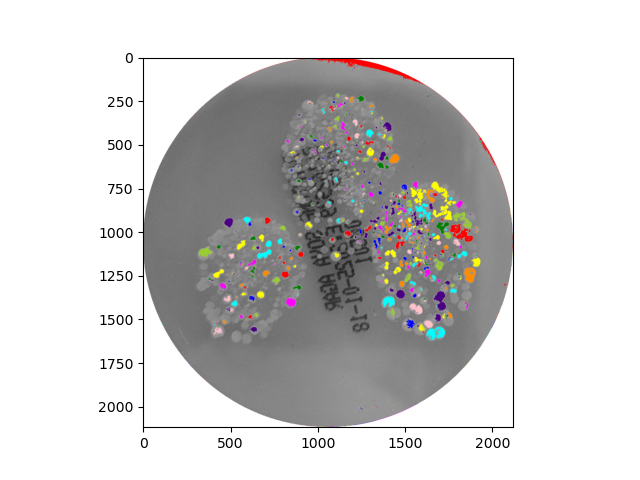

In [10]:
count_colonies('data/voorbeeld.jpg', custom_mask)

# Stap 3 - Functie Toepassen op Alle Afbeeldingen in een Map

In dit voorbeeld passen we de eerder gedefinieerde functie `count_colonies` toe op alle JPEG-afbeeldingen in de map `data/`. Dit doen we met behulp van de module `glob`, die ons in staat stelt om met wildcards te zoeken naar bestanden die voldoen aan een bepaald patroon.

Verwerken van: data/voorbeeld.jpg
Er zijn 1584 kolonies in data/voorbeeld.jpg
Aantal kolonies in data/voorbeeld.jpg: 1584



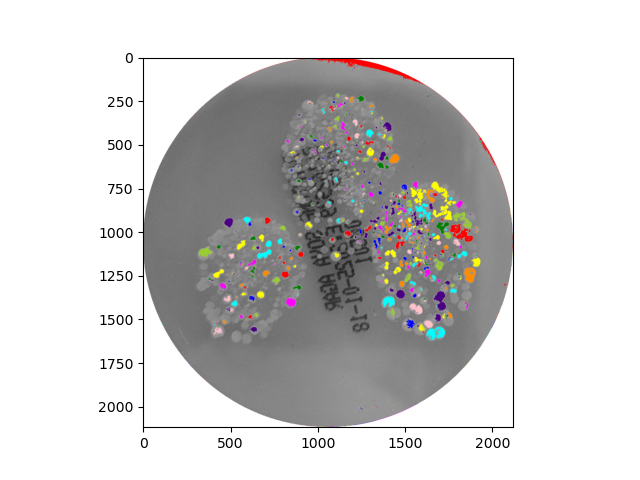

In [11]:
import glob

# Zoek alle .jpg-bestanden in de map 'data'
image_files = glob.glob("data/*.jpg")

# Loop door elk gevonden bestand en tel de kolonies
for image_file in image_files:
    print(f"Verwerken van: {image_file}")
    # Hier kan je bijvoorbeeld een drempelwaarde meegeven of een maskerfunctie
    colonies = count_colonies(image_file, custom_mask)
    print(f"Aantal kolonies in {image_file}: {colonies}\n")